# Colorectal Adenocarcinoma (TCGA, PanCancer Atlas)

1. Load patient data and sample data. Join the two tables and remove the obvious useless columns from the two tables.
1. Perform a detailed analysis of the columns left in the dataset to decide which ones to keep. After this, all columns of X is ready for model development.
1. Prepare the target column y.
1. Since X and y are ready, pass X,y through popular ML models and assess performance.

Note: This notebook was used just to create the pipeline. The pipeline will be reused but the prediction task itself is naive.

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from helpers import load_config
import sys
import os

In [3]:
configs = load_config(os.path.join("configs", "configs.yaml"))

## 1. Load patient and sample data and remove obvious useless columns

#### 1.1 Reading and exploring data clinical patient file

In [4]:
patientdf = pd.read_csv(
    os.path.join(configs["STORAGE_DIR_STUDY2"], "data_clinical_patient.txt"),
    sep="\t",
    header=4
)
patientdf.head()

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
0,TCGA-3L-AA1B,COAD_CIN,COAD,A94E1279-A975-480A-93E9-7B1FF05CBCBF,61.0,Female,STAGE I,7TH,475.0,-22379.0,...,Yes,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,AFR_ADMIX
1,TCGA-4N-A93T,COAD_CIN,COAD,92554413-9EBC-4354-8E1B-9682F3A031D9,67.0,Male,STAGE IIIB,7TH,146.0,-24523.0,...,Yes,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,AFR
2,TCGA-4T-AA8H,COAD_CIN,COAD,A5E14ADD-1552-4606-9FFE-3A03BCF76640,42.0,Female,STAGE IIA,7TH,385.0,-15494.0,...,Yes,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,AFR_ADMIX
3,TCGA-5M-AAT4,COAD_CIN,COAD,1136DD50-242A-4659-AAD4-C53F9E759BB3,74.0,Male,STAGE IV,6TH,NaN,-27095.0,...,Yes,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,AFR
4,TCGA-5M-AAT6,COAD_MSI,COAD,CE00896A-F7D2-4123-BB95-24CB6E53FC32,40.0,Female,STAGE IV,6TH,NaN,-14852.0,...,Yes,1:DECEASED,9.534142,1:DEAD WITH TUMOR,9.534142,NaN,NaN,1:PROGRESSION,7.199921,AFR


In [5]:
patientdf.head(3).T

,0,1,2
PATIENT_ID,TCGA-3L-AA1B,TCGA-4N-A93T,TCGA-4T-AA8H
SUBTYPE,COAD_CIN,COAD_CIN,COAD_CIN
CANCER_TYPE_ACRONYM,COAD,COAD,COAD
OTHER_PATIENT_ID,A94E1279-A975-480A-93E9-7B1FF05CBCBF,92554413-9EBC-4354-8E1B-9682F3A031D9,A5E14ADD-1552-4606-9FFE-3A03BCF76640
AGE,61.0,67.0,42.0
SEX,Female,Male,Female
AJCC_PATHOLOGIC_TUMOR_STAGE,STAGE I,STAGE IIIB,STAGE IIA
AJCC_STAGING_EDITION,7TH,7TH,7TH
DAYS_LAST_FOLLOWUP,475.0,146.0,385.0
DAYS_TO_BIRTH,-22379.0,-24523.0,-15494.0


In [6]:
subset_clinical = patientdf.head().T

In [7]:
print(patientdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PATIENT_ID                                  594 non-null    object 
 1   SUBTYPE                                     459 non-null    object 
 2   CANCER_TYPE_ACRONYM                         594 non-null    object 
 3   OTHER_PATIENT_ID                            592 non-null    object 
 4   AGE                                         592 non-null    float64
 5   SEX                                         592 non-null    object 
 6   AJCC_PATHOLOGIC_TUMOR_STAGE                 580 non-null    object 
 7   AJCC_STAGING_EDITION                        524 non-null    object 
 8   DAYS_LAST_FOLLOWUP                          544 non-null    float64
 9   DAYS_TO_BIRTH                               590 non-null    float64
 10  DAYS_TO_INITIA

In [8]:
patientdf.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,592.0,66.123311,12.875428,31.000000,58.000000,68.000000,76.000000,90.000000
DAYS_LAST_FOLLOWUP,544.0,806.963235,768.585696,-9.000000,365.000000,626.000000,1065.250000,4502.000000
DAYS_TO_BIRTH,590.0,-24319.216949,4698.982877,-32873.000000,-27831.000000,-24837.000000,-21298.750000,-11381.000000
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,592.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WEIGHT,317.0,80.282151,20.999008,34.000000,64.900000,78.100000,91.800000,175.300000
OS_MONTHS,590.0,27.098807,24.463500,0.000000,12.238222,21.073742,35.925634,148.009337
DSS_MONTHS,590.0,27.098807,24.463500,0.000000,12.238222,21.073742,35.925634,148.009337
DFS_MONTHS,223.0,30.178427,21.160558,0.526022,16.684749,26.038071,37.018772,148.009337
PFS_MONTHS,590.0,24.158714,23.319578,0.000000,10.076602,18.920341,32.711970,148.009337


In [9]:
patientdf.isnull().sum()

PATIENT_ID                                      0
SUBTYPE                                       135
CANCER_TYPE_ACRONYM                             0
OTHER_PATIENT_ID                                2
AGE                                             2
SEX                                             2
AJCC_PATHOLOGIC_TUMOR_STAGE                    14
AJCC_STAGING_EDITION                           70
DAYS_LAST_FOLLOWUP                             50
DAYS_TO_BIRTH                                   4
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS            2
ETHNICITY                                     246
FORM_COMPLETION_DATE                            2
HISTORY_NEOADJUVANT_TRTYN                       2
ICD_10                                          3
ICD_O_3_HISTOLOGY                               3
ICD_O_3_SITE                                    3
INFORMED_CONSENT_VERIFIED                       2
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT       108
PATH_M_STAGE                                    9


In [10]:
patientdf.columns
['PATIENT_ID', 'SUBTYPE', 'CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID',
'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'ETHNICITY',
'FORM_COMPLETION_DATE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10',
'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RACE',
'RADIATION_THERAPY', 'WEIGHT', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
'PFS_STATUS', 'PFS_MONTHS', 'GENETIC_ANCESTRY_LABEL']

['PATIENT_ID',
 'SUBTYPE',
 'CANCER_TYPE_ACRONYM',
 'OTHER_PATIENT_ID',
 'AGE',
 'SEX',
 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'AJCC_STAGING_EDITION',
 'DAYS_LAST_FOLLOWUP',
 'DAYS_TO_BIRTH',
 'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS',
 'ETHNICITY',
 'FORM_COMPLETION_DATE',
 'HISTORY_NEOADJUVANT_TRTYN',
 'ICD_10',
 'ICD_O_3_HISTOLOGY',
 'ICD_O_3_SITE',
 'INFORMED_CONSENT_VERIFIED',
 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
 'PATH_M_STAGE',
 'PATH_N_STAGE',
 'PATH_T_STAGE',
 'PERSON_NEOPLASM_CANCER_STATUS',
 'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT',
 'PRIOR_DX',
 'RACE',
 'RADIATION_THERAPY',
 'WEIGHT',
 'IN_PANCANPATHWAYS_FREEZE',
 'OS_STATUS',
 'OS_MONTHS',
 'DSS_STATUS',
 'DSS_MONTHS',
 'DFS_STATUS',
 'DFS_MONTHS',
 'PFS_STATUS',
 'PFS_MONTHS',
 'GENETIC_ANCESTRY_LABEL']

In [11]:
patientdf.HISTORY_NEOADJUVANT_TRTYN.value_counts(dropna=False)

HISTORY_NEOADJUVANT_TRTYN
No     590
Yes      2
NaN      2
Name: count, dtype: int64

In [12]:
patientdf.PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT.value_counts(dropna=False)

PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT
Yes    557
No      19
NaN     18
Name: count, dtype: int64

In [13]:
columns_being_discarded =  [
    # 'SUBTYPE', # consider for later analysis
    'CANCER_TYPE_ACRONYM', # same value for all records
    'OTHER_PATIENT_ID', # id column not related to any data of our interest
    'AJCC_STAGING_EDITION', # version of handbook used for classification
    'DAYS_LAST_FOLLOWUP', # similar but more relevant information captured in OS_Months
    'DAYS_TO_BIRTH', # age captures similar information 
    'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', # similar but more relevant information captured in OS_Months 
    'ETHNICITY', # race column has more rich data
    'FORM_COMPLETION_DATE', # irrelevant to analysis
    'HISTORY_NEOADJUVANT_TRTYN', # highly skewed, 590 No, 2 Yes, 2 Null
    'ICD_O_3_HISTOLOGY' , # which edition of certain code used for tabulating data
    'ICD_O_3_SITE', # which edition of certain code used for tabulating data
    'INFORMED_CONSENT_VERIFIED', # irrelevant to analysis
    'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', # highly skewed 557 Yes, 19 No, 18 Null
    'IN_PANCANPATHWAYS_FREEZE', # if patient is part of a certain analysis, irrelevant
    ]

In [14]:
patientdf_1 = patientdf.drop(columns=columns_being_discarded)
patientdf_1.head(3).T

,0,1,2
PATIENT_ID,TCGA-3L-AA1B,TCGA-4N-A93T,TCGA-4T-AA8H
SUBTYPE,COAD_CIN,COAD_CIN,COAD_CIN
AGE,61.0,67.0,42.0
SEX,Female,Male,Female
AJCC_PATHOLOGIC_TUMOR_STAGE,STAGE I,STAGE IIIB,STAGE IIA
ICD_10,C18.0,C18.2,C18.6
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,No,No,No
PATH_M_STAGE,M0,M0,MX
PATH_N_STAGE,N0,N1B,N0
PATH_T_STAGE,T2,T4A,T3


In [15]:
patientdf_1.shape

(594, 24)

#### 1.2 Reading and exploring data clinical sample 

In [16]:
sampledf = pd.read_csv(
    os.path.join(configs["STORAGE_DIR_STUDY2"], "data_clinical_sample.txt"),
    sep="\t",
    header=4
)
sampledf.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
0,TCGA-AF-2687,TCGA-AF-2687-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,Yes,No,AF,Rectum,24.0,Primary,0.3529,0.08,Matched,3.266667,Albert Einstein Medical Center
1,TCGA-AF-2689,TCGA-AF-2689-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,Yes,No,AF,Rectum,18.0,Primary,0.3486,1.28,Matched,1.733333,Mary Bird Perkins Cancer Center - Our Lady of ...
2,TCGA-AF-2690,TCGA-AF-2690-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,Yes,No,AF,Rectum,25.0,Primary,0.3412,0.03,Matched,2.366667,Duke University
3,TCGA-AF-2691,TCGA-AF-2691-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,Yes,No,AF,Rectum,11.0,Primary,0.3267,1.16,Matched,2.233333,University of Sao Paulo
4,TCGA-AF-2692,TCGA-AF-2692-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectum Adenocarcinoma,NaN,Yes,No,AF,NaN,16.0,Primary,0.3259,1.32,Matched,0.733333,University of Sao Paulo


In [17]:
sampledf.shape

(594, 18)

In [18]:
print(sampledf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PATIENT_ID                                 594 non-null    object 
 1   SAMPLE_ID                                  594 non-null    object 
 2   ONCOTREE_CODE                              594 non-null    object 
 3   CANCER_TYPE                                594 non-null    object 
 4   CANCER_TYPE_DETAILED                       594 non-null    object 
 5   TUMOR_TYPE                                 594 non-null    object 
 6   GRADE                                      0 non-null      float64
 7   TISSUE_PROSPECTIVE_COLLECTION_INDICATOR    575 non-null    object 
 8   TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR  575 non-null    object 
 9   TISSUE_SOURCE_SITE_CODE                    594 non-null    object 
 10  TUMOR_TISSUE_SITE         

In [19]:
print("Null Value Count:")
sampledf.isnull().sum()

Null Value Count:


PATIENT_ID                                     0
SAMPLE_ID                                      0
ONCOTREE_CODE                                  0
CANCER_TYPE                                    0
CANCER_TYPE_DETAILED                           0
TUMOR_TYPE                                     0
GRADE                                        594
TISSUE_PROSPECTIVE_COLLECTION_INDICATOR       19
TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR     19
TISSUE_SOURCE_SITE_CODE                        0
TUMOR_TISSUE_SITE                              6
ANEUPLOIDY_SCORE                               8
SAMPLE_TYPE                                    0
MSI_SCORE_MANTIS                              37
MSI_SENSOR_SCORE                              10
SOMATIC_STATUS                                 0
TMB_NONSYNONYMOUS                             60
TISSUE_SOURCE_SITE                             0
dtype: int64

In [20]:
subset_sample = sampledf.head().T

In [21]:
sampledf.describe()

,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,TMB_NONSYNONYMOUS
count,0.0,586.000000,557.000000,584.000000,534.000000
mean,NaN,12.300341,0.411875,4.279349,13.642072
std,NaN,8.132570,0.215647,10.173704,36.081945
min,NaN,0.000000,0.251300,0.000000,0.000000
25%,NaN,6.000000,0.321800,0.100000,2.666667
50%,NaN,12.000000,0.343600,0.350000,3.500000
75%,NaN,19.000000,0.366900,0.975000,5.133333
max,NaN,31.000000,1.377700,46.780000,382.633333


In [22]:
sampledf.columns

Index(['PATIENT_ID', 'SAMPLE_ID', 'ONCOTREE_CODE', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'TUMOR_TYPE', 'GRADE',
       'TISSUE_PROSPECTIVE_COLLECTION_INDICATOR',
       'TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR', 'TISSUE_SOURCE_SITE_CODE',
       'TUMOR_TISSUE_SITE', 'ANEUPLOIDY_SCORE', 'SAMPLE_TYPE',
       'MSI_SCORE_MANTIS', 'MSI_SENSOR_SCORE', 'SOMATIC_STATUS',
       'TMB_NONSYNONYMOUS', 'TISSUE_SOURCE_SITE'],
      dtype='object')

In [23]:
columns_being_discarded_sampledf = [
    'TISSUE_PROSPECTIVE_COLLECTION_INDICATOR', # when sample was collected, before or after
    'TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR', # when sample was collected, before or after
    'TISSUE_SOURCE_SITE_CODE', # which hospital was the sample collected at
    'TUMOR_TISSUE_SITE', # part of body where sample was collected
    'SAMPLE_TYPE', # has only one value "Primary"
    'TISSUE_SOURCE_SITE' # which hospital was the sample collected at
]

In [24]:
# only for notes
columns_to_keep_sampledf = [
    'PATIENT_ID', 
    'SAMPLE_ID', 
    'ONCOTREE_CODE', # redundant since ICD_10 captures the same info
    'CANCER_TYPE',
    'CANCER_TYPE_DETAILED',  # redundant since ICD_10 captures the same info
    'TUMOR_TYPE', 
    'GRADE', # might be the same as patient.PATH_T_STAGE
    'ANEUPLOIDY_SCORE', 
    'MSI_SCORE_MANTIS', # genetic instability
    'MSI_SENSOR_SCORE', 
    'SOMATIC_STATUS',
    'TMB_NONSYNONYMOUS', 
]

In [25]:
sampledf_1 = sampledf.drop(columns=columns_being_discarded_sampledf)
sampledf_1.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-AF-2687,TCGA-AF-2687-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,24.0,0.3529,0.08,Matched,3.266667
1,TCGA-AF-2689,TCGA-AF-2689-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,18.0,0.3486,1.28,Matched,1.733333
2,TCGA-AF-2690,TCGA-AF-2690-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,25.0,0.3412,0.03,Matched,2.366667
3,TCGA-AF-2691,TCGA-AF-2691-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectal Adenocarcinoma,NaN,11.0,0.3267,1.16,Matched,2.233333
4,TCGA-AF-2692,TCGA-AF-2692-01,READ,Colorectal Cancer,Rectal Adenocarcinoma,Rectum Adenocarcinoma,NaN,16.0,0.3259,1.32,Matched,0.733333


In [26]:
max_samples = sampledf_1.groupby('PATIENT_ID')['SAMPLE_ID'].nunique().max()
print("Maximum number of sample_ids for a given patient_id:", max_samples)

Maximum number of sample_ids for a given patient_id: 1


In [27]:
sampledf_1.shape, patientdf_1.shape

((594, 12), (594, 24))

#### 1.3 Joining patient and sample data 

In [28]:
df = pd.merge(patientdf_1, sampledf_1, on='PATIENT_ID', how='inner')
df.head()

,PATIENT_ID,SUBTYPE,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,...,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-3L-AA1B,COAD_CIN,61.0,Female,STAGE I,C18.0,No,M0,N0,T2,...,COAD,Colorectal Cancer,Colon Adenocarcinoma,Colon Adenocarcinoma,NaN,19.0,0.3057,0.05,Matched,4.033333
1,TCGA-4N-A93T,COAD_CIN,67.0,Male,STAGE IIIB,C18.2,No,M0,N1B,T4A,...,COAD,Colorectal Cancer,Colon Adenocarcinoma,Colon Adenocarcinoma,NaN,13.0,0.3317,0.69,Matched,2.900000
2,TCGA-4T-AA8H,COAD_CIN,42.0,Female,STAGE IIA,C18.6,No,MX,N0,T3,...,MACR,Colorectal Cancer,Mucinous Adenocarcinoma of the Colon and Rectum,"Colon Adenocarcinoma, Mucinous Type",NaN,18.0,0.3144,0.17,Matched,4.000000
3,TCGA-5M-AAT4,COAD_CIN,74.0,Male,STAGE IV,C18.2,No,M1B,N0,T3,...,COAD,Colorectal Cancer,Colon Adenocarcinoma,Colon Adenocarcinoma,NaN,18.0,0.3232,0.55,Matched,5.833333
4,TCGA-5M-AAT6,COAD_MSI,40.0,Female,STAGE IV,C18.2,Yes,M1A,N2B,T4A,...,COAD,Colorectal Cancer,Colon Adenocarcinoma,Colon Adenocarcinoma,NaN,3.0,0.6600,20.58,Matched,62.166667


In [29]:
df.to_excel(
    os.path.join(configs["STORAGE_DIR_STUDY2"], "user_friendly_formats", "raw_patient_sample_merge.xlsx")
)

## 2. Detailed Analysis of Columns left to construct X

#### 2.1 Review columns and strategize

In [30]:
df.RADIATION_THERAPY.value_counts(dropna=False)

RADIATION_THERAPY
No     463
NaN    104
Yes     27
Name: count, dtype: int64

In [31]:
df.PERSON_NEOPLASM_CANCER_STATUS.value_counts(dropna=False)

PERSON_NEOPLASM_CANCER_STATUS
With Tumor    275
Tumor Free    256
NaN            63
Name: count, dtype: int64

In [32]:
df.AJCC_PATHOLOGIC_TUMOR_STAGE.value_counts(dropna=False)

AJCC_PATHOLOGIC_TUMOR_STAGE
STAGE IIA     171
STAGE I       103
STAGE IIIB     80
STAGE IV       58
STAGE IIIC     54
STAGE II       35
STAGE IVA      26
STAGE III      22
STAGE IIIA     14
NaN            14
STAGE IIB      12
STAGE IIC       2
STAGE IVB       2
STAGE IA        1
Name: count, dtype: int64

In [33]:
df.isnull().sum().sort_values(ascending=False)

GRADE                                      594
DFS_MONTHS                                 371
DFS_STATUS                                 371
WEIGHT                                     277
RACE                                       232
SUBTYPE                                    135
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT    108
RADIATION_THERAPY                          104
PERSON_NEOPLASM_CANCER_STATUS               63
TMB_NONSYNONYMOUS                           60
MSI_SCORE_MANTIS                            37
DSS_STATUS                                  24
AJCC_PATHOLOGIC_TUMOR_STAGE                 14
MSI_SENSOR_SCORE                            10
PATH_M_STAGE                                 9
ANEUPLOIDY_SCORE                             8
OS_MONTHS                                    4
DSS_MONTHS                                   4
PFS_MONTHS                                   4
OS_STATUS                                    3
ICD_10                                       3
PFS_STATUS   

<u>Columns being dropped: </u>

1. Column: GRADE    
Reason to drop: All values are missing

1. Column: DFS_MONTHS/DFS_STATUS    
Reason to drop: 371 missing values and other columns available for the same insight.

1. Column: SUBTYPE / ICD_10 /  
Reason to drop: has 135 / 3 null values; CANCER_TYPE_DETAILED has same information with no null values

1. Column: NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT    
Reason to drop: 108 null values        

1. Column: DSS_STATUS/DSS_MONTHS    
Reason to drop: 24/4 null values and other columns available for the same insight.        

1. Column: AJCC_PATHOLOGIC_TUMOR_STAGE     
Reason to drop: PATH_T_STAGE might be conveying the same info with lesser missing values. (The values of the two columns donot always match. Asked expert, waiting for response; TODO)         

1. Column: SOMATIC_STATUS     
Reason to drop: only 1 value : Matched

1. Column: TUMOR_TYPE    
Reason to drop: high correlation with CANCER_TYPE_DETAILED. Very few mismatches. According to ChatGPT, CANCER_TYPE_DETAILED is more detailed(unverified).

1. Column: CANCER_TYPE    
Reason to drop: only 1 value : Colon Adenocarcinoma

1. Column: RACE    
Reason to drop: 232 null; Genetic Ancestry Label has same information but lessed missing values 

1. Column: CANCER_TYPE_DETAILED    
Reason to drop: ONCOTREE_CODE has same info, but lesser letters, better to keep it for presentation

1. Column:     
Reason to drop:       

<u>Handling important columns with Null Values</u>

1. Column: WEIGHT        
Number of null values: 277    
How to handle: Average weight    

1. Column: RADIATION_THERAPY       
Number of null values: 104    
How to handle: ??(Maybe Impute with no), Also try dropping column and compare performance       

1. Column: PERSON_NEOPLASM_CANCER_STATUS       
Number of null values: 63    
How to handle: try imputing with majority class and one model after removing the 63 rows and one model after removing the column and compare performance     

1. Column: TMB_NONSYNONYMOUS       
Number of null values: 60    
How to handle: impute with avg value 

1. Column: MSI_SCORE_MANTIS       
Number of null values: 37    
How to handle: impute with avg value 

1. Column: AJCC_PATHOLOGIC_TUMOR_STAGE       
Number of null values: 14    
How to handle: remove rows with missing value 

1. Column: MSI_SENSOR_SCORE       
Number of null values: 10    
How to handle: impute with average

1. Column: PATH_M_STAGE       
Number of null values: 8    
How to handle: ??

1. Column: ANEUPLOIDY_SCORE       
Number of null values: 8    
How to handle: ??

1. Column: OS_MONTHS / PFS_MONTHS      
Number of null values: 4 / 4    
How to handle: ??

1. Column: OS_STATUS / PFS_STATUS       
Number of null values: 3 / 3    
How to handle: ??

1. Column: PRIOR_DX       
Number of null values: 2    
How to handle: ??

1. Column: SEX       
Number of null values: 2    
How to handle: impute with majority value, also try after removing the column

1. Column: PATH_N_STAGE       
Number of null values:     
How to handle: 

1. Column: PATH_T_STAGE        
Number of null values:     
How to handle: 

1. Column: AGE       
Number of null values: 2    
How to handle: impute with avg value

1. Column:        
Number of null values:     
How to handle: 


In [34]:
columns_to_drop = [
    'GRADE',
    'DFS_MONTHS', 'DFS_STATUS',
    'SUBTYPE', 'ICD_10',
    'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
    'DSS_STATUS', 'DSS_MONTHS',
    'AJCC_PATHOLOGIC_TUMOR_STAGE',
    'SOMATIC_STATUS',
    'TUMOR_TYPE',
    'CANCER_TYPE',
    'RACE',
    'CANCER_TYPE_DETAILED', 
    "OS_STATUS", "OS_MONTHS"
]

df = df.drop(columns=columns_to_drop)

#### 2.2 Performing easy tranformation by excluding rows with any nulls

In [35]:
df1 = df.dropna()
df.shape, df1.shape

((594, 19), (243, 19))

#### 2.3 Transforming columns to create X for model

In [36]:
def show_unique_vals_by_column(df):
    """Function to show distinct values in each column of a pandas dataframe"""
    numeric_cols = []
    for column in df.columns:
        if df[column].dtype == object:  # Check if the column data type is object (typically used for text)
            unique_values = df[column].unique()
            print(f"Column '{column}' has {len(unique_values)} unique values: {sorted(unique_values)[:10]} {'...' if len(unique_values) > 10 else ''}")
        else:
            numeric_cols.append(column)
    print(f"Ignored these numeric columns: {numeric_cols}")

In [37]:
show_unique_vals_by_column(df1)

Column 'PATIENT_ID' has 243 unique values: ['TCGA-3L-AA1B', 'TCGA-4N-A93T', 'TCGA-4T-AA8H', 'TCGA-5M-AAT6', 'TCGA-5M-AATE', 'TCGA-A6-2671', 'TCGA-A6-2674', 'TCGA-A6-2675', 'TCGA-A6-2677', 'TCGA-A6-2678'] ...
Column 'SEX' has 2 unique values: ['Female', 'Male'] 
Column 'PATH_M_STAGE' has 5 unique values: ['M0', 'M1', 'M1A', 'M1B', 'MX'] 
Column 'PATH_N_STAGE' has 8 unique values: ['N0', 'N1', 'N1A', 'N1B', 'N1C', 'N2', 'N2A', 'N2B'] 
Column 'PATH_T_STAGE' has 7 unique values: ['T1', 'T2', 'T3', 'T4', 'T4A', 'T4B', 'TIS'] 
Column 'PERSON_NEOPLASM_CANCER_STATUS' has 2 unique values: ['Tumor Free', 'With Tumor'] 
Column 'PRIOR_DX' has 3 unique values: ['No', 'Yes', 'Yes, History Of Synchronous And Or Bilateral Malignancy'] 
Column 'RADIATION_THERAPY' has 2 unique values: ['No', 'Yes'] 
Column 'PFS_STATUS' has 2 unique values: ['0:CENSORED', '1:PROGRESSION'] 
Column 'GENETIC_ANCESTRY_LABEL' has 6 unique values: [' ', 'AFR', 'AFR_ADMIX', 'EAS', 'EUR', 'EUR_ADMIX'] 
Column 'SAMPLE_ID' has 243

##### Data Specifications for the pipeline:
1. GENETIC_ANCESTRY_LABEL: 
    - has values like [' ', 'AFR', 'AFR_ADMIX', 'EAS', 'EUR', 'EUR_ADMIX']
    - highly skewed toward EUR. 
    - output 1 for EUR(white), 0 for non-EUR(non-white).
    - potentially modify later to include other races if good number of records are available.

1. PRIOR_DX
    - starts with either Yes or No. 

1. PATH_M_STAGE
    - contains values out of [M0, M1, M1A, M1B, MX]

1. PATH_T_STAGE
    - contains values out of ['T1', 'T2', 'T3', 'T4', 'T4A', 'T4B', 'TIS']

1. PATH_N_STAGE
    - contains values out of ['N0', 'N1', 'N1A', 'N1B', 'N1C', 'N2', 'N2A', 'N2B'] 

1. All other columns are either object type or int64 type.




##### 2.3.1 Function for Race(GENETIC_ANCESTRY_LABEL)

In [38]:
df1.GENETIC_ANCESTRY_LABEL.value_counts()

GENETIC_ANCESTRY_LABEL
EUR          180
AFR           35
AFR_ADMIX     16
EAS            7
               4
EUR_ADMIX      1
Name: count, dtype: int64

In [39]:
def genetic_ancestry_to_eur_ind(race:str):
    """Function that takes GENETIC_ANCESTRY_LABEL as input and returns 1 for European(White) and 0 for non-European"""
    if 'EUR' in race:
        return 1
    else:
        return 0

In [40]:
df1.GENETIC_ANCESTRY_LABEL.apply(genetic_ancestry_to_eur_ind).head(2)

0    0
1    0
Name: GENETIC_ANCESTRY_LABEL, dtype: int64

##### 2.3.2 Function for Prior DX

In [41]:
prior_dx = 'Yes, History Of Synchronous And Or Bilateral Malignancy'
prior_dx.upper().startswith("YES")

True

In [42]:
def cleanup_prior_dx(prior_dx):
    """Remove extra details and return just Y/N"""
    if prior_dx.upper().startswith("YES"):
        return "Y"
    elif prior_dx.upper().startswith("NO"): 
        return "N"
    else:
        print("Unexpected value for 'PRIOR_DX'...exiting")
        sys.exit(0)

##### 2.3.2 Functions for TNM stage

In [43]:
df1.PATH_M_STAGE.value_counts()

PATH_M_STAGE
M0     172
MX      40
M1      21
M1A      9
M1B      1
Name: count, dtype: int64

Problem: MX means Metastatis stage. M0 and M1 can be label encoded but MX means metastatis could not be evaluated possibly because of insufficient test. How to handle MX?

Solution: Try out label encoding(MX between M0 and M1) and one hot encoding.

In [44]:
def label_encode_m_stage(m_stage:str):
    """
    Label encode m-stage. Can handle only : [M0, M1, M1A, M1B, MX] 
    """
    m_stage = m_stage.upper()
    if m_stage == 'M0':
        return 0
    elif m_stage == 'MX':
        return 0.5
    elif m_stage == 'M1' or m_stage == 'M1A':
        return 1
    elif m_stage == 'M1B':
        return 1.5
    else:
        print("Unexpected value for M-Stage...exiting")
        sys.exit(0)

In [45]:
df1['PATH_M_STAGE'].apply(label_encode_m_stage).head(2)

0    0.0
1    0.0
Name: PATH_M_STAGE, dtype: float64

In [46]:
def label_encode_t_stage(t_stage:str):
    """
    Label encode T-stage. Can handle only : ['T1', 'T2', 'T3', 'T4', 'T4A', 'T4B', 'TIS'] 
    """
    t_stage = t_stage.upper()
    if t_stage == 'TIS':
        return 0
    elif t_stage == 'T1':
        return 1
    elif t_stage == 'T2':
        return 2
    elif t_stage == 'T3':
        return 3
    elif t_stage == 'T4' or t_stage == 'T4A':
        return 4
    elif t_stage == 'T4B':
        return 4.5
    else:
        print("Unexpected value for T-Stage...exiting")
        sys.exit(0)

In [47]:
df1["PATH_T_STAGE"].apply(label_encode_t_stage).head(2)

0    2.0
1    4.0
Name: PATH_T_STAGE, dtype: float64

In [48]:
def label_encode_n_stage(n_stage:str):
    """
    Label encode N-stage. Can handle only : ['N0', 'N1', 'N1A', 'N1B', 'N1C', 'N2', 'N2A', 'N2B'] 
    """
    n_stage = n_stage.upper()
    if n_stage == 'N0':
        return 0
    elif n_stage == 'N1' or n_stage == 'N1A':
        return 1
    elif n_stage == 'N1B':
        return 1.33
    elif n_stage == 'N1C':
        return 1.66
    elif n_stage == 'N2' or n_stage == 'N2A':
        return 2
    elif n_stage == 'N2B':
        return 2.5
    else:
        print("Unexpected value for N-Stage...exiting")
        sys.exit(0)

In [49]:
df1['PATH_N_STAGE'].apply(label_encode_n_stage).head(2)

0    0.00
1    1.33
Name: PATH_N_STAGE, dtype: float64

##### 2.3.3 Function that takes data in and performs all the transformations defined in the same section above

In [50]:
def preprocess_data(df1:pd.DataFrame):
    """
    Function to preprocess data so that 
    1. TNM Stage, Prior Diagnosis, Genetic Ancestry Label columns are cleaned
    2. All object type columns are converted to one hot encoding
    """
    columns = df1.columns
    df1 = df1.copy()

    # label encode TNM Stage
    if 'PATH_M_STAGE' in columns:
        df1["PATH_M_STAGE"] = df1["PATH_M_STAGE"].apply(label_encode_m_stage)
        print("Label encoded PATH_M_STAGE")

    if 'PATH_N_STAGE' in columns:
        df1["PATH_N_STAGE"] = df1["PATH_N_STAGE"].apply(label_encode_n_stage)
        print("Label encoded PATH_N_STAGE")

    if 'PATH_T_STAGE' in columns:
        df1["PATH_T_STAGE"] = df1["PATH_T_STAGE"].apply(label_encode_t_stage)
        print("Label encoded PATH_T_STAGE")

    # cleanup prior diagno
    if 'PRIOR_DX' in columns:
        df1["PRIOR_DX"] = df1["PRIOR_DX"].apply(cleanup_prior_dx)
        
    if 'GENETIC_ANCESTRY_LABEL' in columns:
        df1['GENETIC_ANCESTRY_LABEL'] = df1["GENETIC_ANCESTRY_LABEL"].apply(genetic_ancestry_to_eur_ind)
        
    # Apply one-hot encoding to object type columns
    object_columns = df1.select_dtypes(include=['object']).columns
    df_one_hot_encoded = pd.get_dummies(df1, columns=object_columns, drop_first=True, dtype='int64')

    return df_one_hot_encoded


##### 2.3.4 Full transformation using functions defined above 

In [51]:
df1.columns

Index(['PATIENT_ID', 'AGE', 'SEX', 'PATH_M_STAGE', 'PATH_N_STAGE',
       'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS', 'PRIOR_DX',
       'RADIATION_THERAPY', 'WEIGHT', 'PFS_STATUS', 'PFS_MONTHS',
       'GENETIC_ANCESTRY_LABEL', 'SAMPLE_ID', 'ONCOTREE_CODE',
       'ANEUPLOIDY_SCORE', 'MSI_SCORE_MANTIS', 'MSI_SENSOR_SCORE',
       'TMB_NONSYNONYMOUS'],
      dtype='object')

In [52]:
df2 = df1.drop(["PATIENT_ID", "SAMPLE_ID"], axis=1)
X = df2.drop(["PFS_STATUS", "PFS_MONTHS"], axis=1)
y = df1.PFS_STATUS

In [53]:
X = preprocess_data(X)
X.head()

Label encoded PATH_M_STAGE
Label encoded PATH_N_STAGE
Label encoded PATH_T_STAGE


,AGE,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,WEIGHT,GENETIC_ANCESTRY_LABEL,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,TMB_NONSYNONYMOUS,SEX_Male,PERSON_NEOPLASM_CANCER_STATUS_With Tumor,PRIOR_DX_Y,RADIATION_THERAPY_Yes,ONCOTREE_CODE_MACR,ONCOTREE_CODE_READ
0,61.0,0.0,0.00,2.0,63.300,0,19.0,0.3057,0.05,4.033333,0,0,0,0,0,0
1,67.0,0.0,1.33,4.0,134.000,0,13.0,0.3317,0.69,2.900000,1,1,0,0,0,0
2,42.0,0.5,0.00,3.0,107.956,0,18.0,0.3144,0.17,4.000000,0,0,0,0,1,0
4,40.0,1.0,2.50,4.0,99.100,0,3.0,0.6600,20.58,62.166667,0,1,0,0,0,0
5,76.0,0.0,0.00,3.0,75.400,0,20.0,0.3252,0.47,3.800000,1,1,0,0,0,0


## 3. Preparing target column y

In [54]:
target_mapping = {"0:CENSORED": 0, "1:PROGRESSION": 1}

y = y.map(target_mapping)

## 4. Run X, y thru the models

#### 4.1 Define function that takes X and y as input, then standardizes X and passes thru the models

In [55]:
X.head()

,AGE,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,WEIGHT,GENETIC_ANCESTRY_LABEL,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,TMB_NONSYNONYMOUS,SEX_Male,PERSON_NEOPLASM_CANCER_STATUS_With Tumor,PRIOR_DX_Y,RADIATION_THERAPY_Yes,ONCOTREE_CODE_MACR,ONCOTREE_CODE_READ
0,61.0,0.0,0.00,2.0,63.300,0,19.0,0.3057,0.05,4.033333,0,0,0,0,0,0
1,67.0,0.0,1.33,4.0,134.000,0,13.0,0.3317,0.69,2.900000,1,1,0,0,0,0
2,42.0,0.5,0.00,3.0,107.956,0,18.0,0.3144,0.17,4.000000,0,0,0,0,1,0
4,40.0,1.0,2.50,4.0,99.100,0,3.0,0.6600,20.58,62.166667,0,1,0,0,0,0
5,76.0,0.0,0.00,3.0,75.400,0,20.0,0.3252,0.47,3.800000,1,1,0,0,0,0


In [56]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import xgboost as xgb


def multiclass_classification(X, y, n_splits=5):
    """
    Perform multiclass classification using k-fold cross-validation.
    
    Parameters:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.
        n_splits (int): Number of splits for k-fold cross-validation.
        
    Returns:
        dict: Dictionary containing accuracy and recall scores for each model.
    """
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(random_state=55),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Linear SVM': SVC(kernel="linear", probability=True),        
        # 'Multinomial Naive Bayes': MultinomialNB(),
        'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
    }
    
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits, random_state=55, shuffle=True)
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Initialize dictionary to store results
    predictions = {}
    
    # Perform k-fold cross-validation for each model
    for name, model in models.items():
        all_y, all_y_pred = [], []
        
        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Standardize the data
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Train the model
            model.fit(X_train_scaled, y_train)
            
            # Predict on the test set
            y_pred = model.predict(X_test_scaled)

            all_y += y_test.tolist()
            all_y_pred += y_pred.tolist()

        accuracy = accuracy_score(all_y, all_y_pred)
        recall = recall_score(all_y, all_y_pred)
        precision = precision_score(all_y, all_y_pred)
        f1Score = f1_score(all_y, all_y_pred)
    
        print(f"{name} - Accuracy: {accuracy*100:.2f}%, Recall: {recall*100:.4f}%")
        # Store results
        predictions[name] = {"F1-Score": f1Score, "Recall": recall, "Accuracy": accuracy, "Precision": precision}
    
    return predictions


#### 4.2 Run data through the models

In [57]:
predictions = multiclass_classification(X, y)

Logistic Regression - Accuracy: 80.25%, Recall: 44.4444%
K-Nearest Neighbors - Accuracy: 81.89%, Recall: 42.8571%
Decision Tree - Accuracy: 74.90%, Recall: 50.7937%
Random Forest - Accuracy: 83.13%, Recall: 46.0317%
Gradient Boosting - Accuracy: 80.66%, Recall: 46.0317%
Support Vector Machine - Accuracy: 84.36%, Recall: 49.2063%
Linear SVM - Accuracy: 83.13%, Recall: 46.0317%
XGBoost - Accuracy: 80.25%, Recall: 50.7937%


In [58]:
pd.DataFrame(predictions).T.sort_values("F1-Score", ascending=False)

,F1-Score,Recall,Accuracy,Precision
Support Vector Machine,0.620000,0.492063,0.843621,0.837838
Random Forest,0.585859,0.460317,0.831276,0.805556
Linear SVM,0.585859,0.460317,0.831276,0.805556
XGBoost,0.571429,0.507937,0.802469,0.653061
Gradient Boosting,0.552381,0.460317,0.806584,0.690476
K-Nearest Neighbors,0.551020,0.428571,0.818930,0.771429
Logistic Regression,0.538462,0.444444,0.802469,0.682927
Decision Tree,0.512000,0.507937,0.748971,0.516129


#### 4.3 Create function to plot feature importance plot

In [59]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# def plot_feature_importance_plot_using_rf(X, y):
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Initialize Random Forest classifier
#     rf_classifier = RandomForestClassifier(random_state=55)

#     # Train the classifier
#     rf_classifier.fit(X_scaled, y)

#     # Get feature importances
#     feature_importances = rf_classifier.feature_importances_

#     # Get feature names
#     feature_names = X.columns  # Replace with actual feature names if available

#     # Create feature importance plot
#     plt.figure(figsize=(10, 6))
#     plt.bar(feature_names, feature_importances)
#     plt.xlabel('Feature')
#     plt.ylabel('Importance')
#     plt.title('Feature Importance Plot')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()


#### 4.4 Plot feature importance plot

In [61]:
from  colorectal_adenocarcinoma.model_evaluators import plot_feature_importance_plot_using_rf

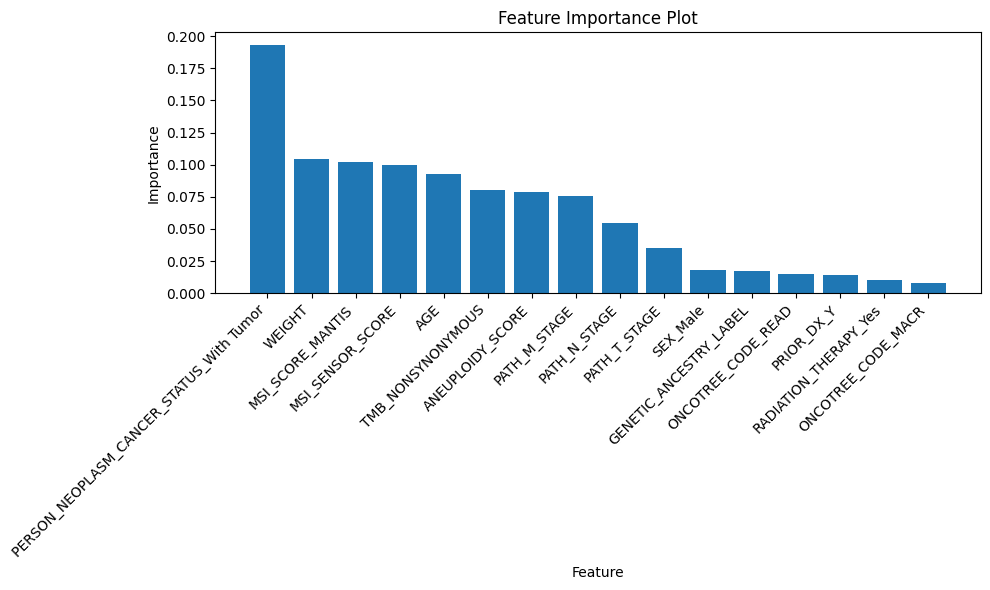

In [62]:
plot_feature_importance_plot_using_rf(X, y)